In [1]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np
from itertools import product

In [2]:
# LTL Specification
ltl = 'F a & (G !c)'

# Translate the LTL formula to an LDBA
oa = OmegaAutomaton(ltl)
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
print('Initial state:',oa.q0)
print('Transition function: ['),print(*['  '+str(t) for t in oa.delta],sep=',\n'),print(']')
print('Acceptance: ['),print(*['  '+str(t) for t in oa.acc],sep=',\n'),print(']')
print('Epsilon actions: ['),print(*['  '+str(t) for t in oa.eps],sep=',\n'), print(']');

Number of Omega-automaton states (including the trap state): 3
Initial state: 0
Transition function: [
  {(): 0, ('a',): 1, ('c',): 2, ('a', 'c'): 2},
  {(): 1, ('a',): 1, ('c',): 2, ('a', 'c'): 2},
  {(): 2, ('a',): 2, ('c',): 2, ('a', 'c'): 2}
]
Acceptance: [
  {(): [None], ('a',): [None], ('c',): [None], ('a', 'c'): [None]},
  {(): [True], ('a',): [True], ('c',): [None], ('a', 'c'): [None]},
  {(): [None], ('a',): [None], ('c',): [None], ('a', 'c'): [None]}
]
Epsilon actions: [
  [],
  [],
  []
]


added epsilon action: (0, 0, 0, 0) 5 -> (0, 1, 0, 0)
added epsilon action: (0, 0, 0, 0) 6 -> (0, 2, 0, 0)
added epsilon action: (0, 0, 0, 1) 5 -> (0, 1, 0, 1)
added epsilon action: (0, 0, 0, 1) 6 -> (0, 2, 0, 1)
added epsilon action: (0, 0, 1, 0) 5 -> (0, 1, 1, 0)
added epsilon action: (0, 0, 1, 0) 6 -> (0, 2, 1, 0)
added epsilon action: (0, 0, 1, 1) 5 -> (0, 1, 1, 1)
added epsilon action: (0, 0, 1, 1) 6 -> (0, 2, 1, 1)


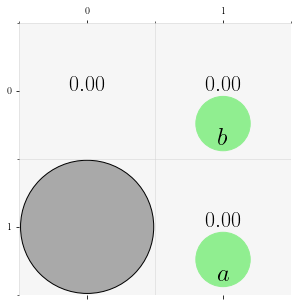

In [70]:
# MDP Description
shape = (2,2)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['E',  'E'],
['B',  'E']
])

# Labels of the states
label = np.array([
[(),       ('b',)],
[(),       ('a',)]
],dtype=object)
# Colors of the labels
lcmap={
    ('a',):'lightgreen',
    ('b',):'lightgreen',
    ('c',):'pink'
}
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,lcmap=lcmap, p=1, figsize=5)  # Use figsize=4 for smaller figures
grid_mdp.plot()

# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

array([[ 0.,  3.],
       [-1.,  1.]])

In [ ]:
csrl.reward

array([[[[0.  , 0.  ],
         [0.  , 0.  ]],

        [[0.01, 0.  ],
         [0.01, 0.01]],

        [[0.  , 0.  ],
         [0.  , 0.  ]]]])

In [71]:
for j in  csrl.transition_probs[0,:]:
    print("LDBA state:")
    for i in j:
        for k in i:
            print("___________________   MDP state:___________________")
            for l in k:
                print("       ", l)
            

LDBA state:
___________________   MDP state:___________________
        ([(0, 0, 0, 1), (0, 0, 0, 0)], [0.0, 1.0])
        ([(0, 0, 0, 1), (0, 0, 0, 0)], [0.0, 1.0])
        ([(0, 0, 0, 1)], [1])
        ([(0, 0, 0, 0)], [1.0])
        None
        ([(0, 1, 0, 0)], [1.0])
        ([(0, 2, 0, 0)], [1.0])
        None
___________________   MDP state:___________________
        ([(0, 0, 0, 0), (0, 0, 0, 1)], [0.0, 1.0])
        ([(0, 0, 1, 1), (0, 0, 0, 0)], [1, 0.0])
        ([(0, 0, 1, 1), (0, 0, 0, 1)], [0.0, 1.0])
        ([(0, 0, 1, 1), (0, 0, 0, 0)], [0.0, 1])
        None
        ([(0, 1, 0, 1)], [1.0])
        ([(0, 2, 0, 1)], [1.0])
        None
___________________   MDP state:___________________
        ([(0, 0, 1, 0)], array([1.]))
        ([(0, 0, 1, 0)], array([1.]))
        ([(0, 0, 1, 0)], array([1.]))
        ([(0, 0, 1, 0)], array([1.]))
        None
        ([(0, 1, 1, 0)], [1.0])
        ([(0, 2, 1, 0)], [1.0])
        None
___________________   MDP state:______________

In [68]:
csrl.transition_probs

array([[[[[([(0, 0, 0, 1), (0, 0, 0, 0)], [0.0, 1.0]),
           ([(0, 0, 0, 1), (0, 0, 0, 0)], [0.0, 1.0]),
           ([(0, 0, 0, 1)], [1]), ([(0, 0, 0, 0)], [1.0]), None, None,
           None],
          [([(0, 2, 0, 0), (0, 2, 0, 1)], [0.0, 1.0]),
           ([(0, 2, 1, 1), (0, 2, 0, 0)], [1, 0.0]),
           ([(0, 2, 1, 1), (0, 2, 0, 1)], [0.0, 1.0]),
           ([(0, 2, 1, 1), (0, 2, 0, 0)], [0.0, 1]), None, None, None]],

         [[([(0, 0, 1, 0)], array([1.])),
           ([(0, 0, 1, 0)], array([1.])),
           ([(0, 0, 1, 0)], array([1.])),
           ([(0, 0, 1, 0)], array([1.])), None, None, None],
          [([(0, 1, 0, 1)], [1]), ([(0, 1, 1, 1)], [1.0]),
           ([(0, 1, 0, 1), (0, 1, 1, 1)], [0.0, 1.0]),
           ([(0, 1, 0, 1), (0, 1, 1, 1)], [0.0, 1.0]), None, None,
           None]]],


        [[[([(0, 1, 0, 1), (0, 1, 0, 0)], [0.0, 1.0]),
           ([(0, 1, 0, 1), (0, 1, 0, 0)], [0.0, 1.0]),
           ([(0, 1, 0, 1)], [1]), ([(0, 1, 0, 0)], [1.0]), None,

In [67]:
# LTL Specification
ltl = 'F G a | F G b'

# Translate the LTL formula to an LDBA
oa = OmegaAutomaton(ltl)
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
print('Initial state:',oa.q0)
print('Transition function: ['),print(*['  '+str(t) for t in oa.delta],sep=',\n'),print(']')
print('Acceptance: ['),print(*['  '+str(t) for t in oa.acc],sep=',\n'),print(']')
print('Epsilon actions: ['),print(*['  '+str(t) for t in oa.eps],sep=',\n'), print(']');

----LDBA info----
HOA: v1
tool: "owl" "* *"
Start: 0
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-acc trans-label 
AP: 2 "a" "b"

State: 0
[t] 0
1
2
State: 2
[0] 2 {0}
State: 1
[1] 1 {0}
--END--

------------------
Number of Omega-automaton states (including the trap state): 4
Initial state: 0
Transition function: [
  {(): 0, ('a',): 0, ('b',): 0, ('a', 'b'): 0},
  {(): 3, ('a',): 3, ('b',): 1, ('a', 'b'): 1},
  {(): 3, ('a',): 2, ('b',): 3, ('a', 'b'): 2},
  {(): 3, ('a',): 3, ('b',): 3, ('a', 'b'): 3}
]
Acceptance: [
  {(): [None], ('a',): [None], ('b',): [None], ('a', 'b'): [None]},
  {(): [None], ('a',): [None], ('b',): [True], ('a', 'b'): [True]},
  {(): [None], ('a',): [True], ('b',): [None], ('a', 'b'): [True]},
  {(): [None], ('a',): [None], ('b',): [None], ('a', 'b'): [None]}
]
Epsilon actions: [
  [1, 2],
  [],
  [],
  []
]


In [ ]:
oa.shape

(1, 4)